   #       The Sparks Foundation

Author : **Deepak Kumar** 
    
Task#1 : Iris Flower Classification ML Project 
                                                
Level : Beginner level task

Language : Python
                                                
IDE : Jupyter Notebook

Github Link : https://github.com/dk208208/The-Sparks-Foundation---GRIP

YouTube Link : https://www.youtube.com/watch?v=-Ibx-jsvVyc&ab_channel=DEEPAK_KUMAR



#### Importing Important Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

####  Importing Dataset

In [2]:
path = "F:\EDYODA\Jupyter Notebook\Grip Foundation\Task#1\Iris.csv"
dataset = pd.read_csv(path )

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Drop ' Id ' column
dataset.drop(columns=['Id'], inplace= True)
x = dataset.iloc[:, [0, 1, 2, 3]].values
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### EDA 

In [5]:
dataset.shape

(150, 5)

In [6]:
dataset.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dataset.drop_duplicates(inplace= True)
dataset.shape

(147, 5)

In [9]:
dataset.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization 

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


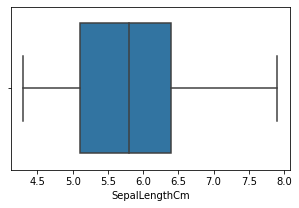

In [11]:
plt.figure(figsize=(5,3))
sns.boxplot(dataset['SepalLengthCm'])
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


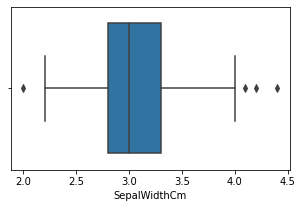

In [12]:
plt.figure(figsize=(5,3))
sns.boxplot(dataset['SepalWidthCm'])
plt.show()

There are some outlier,
lets drop outliers

In [13]:
dataset.drop(dataset[dataset['SepalWidthCm']>4.0].index,inplace=True)
dataset.drop(dataset[dataset['SepalWidthCm']<2.5].index, inplace=True)
dataset.shape

(133, 5)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


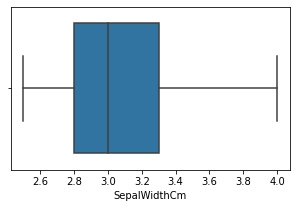

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(dataset['SepalWidthCm'])
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


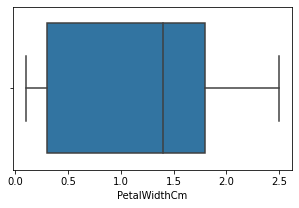

In [15]:
plt.figure(figsize=(5,3))
sns.boxplot(dataset['PetalWidthCm'])
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


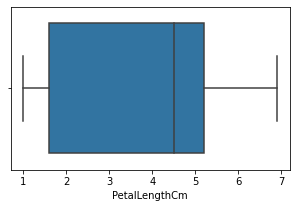

In [16]:
plt.figure(figsize=(5,3))
sns.boxplot(dataset['PetalLengthCm'])
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


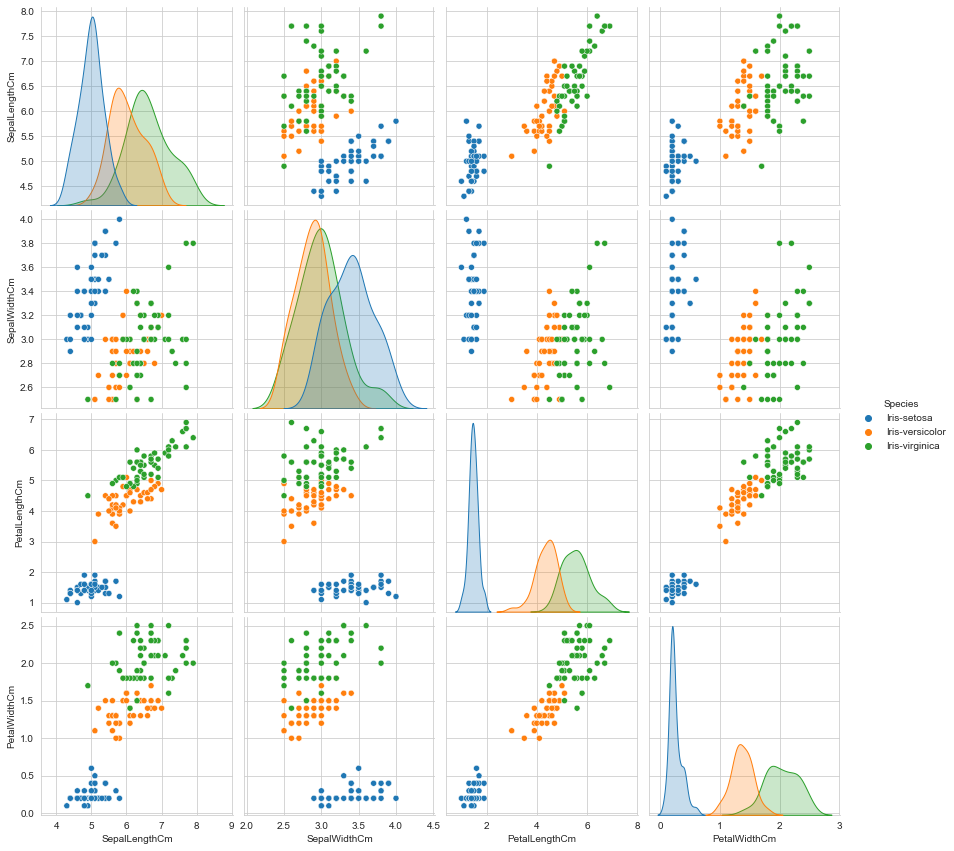

In [17]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="Species",size=3);
plt.show()

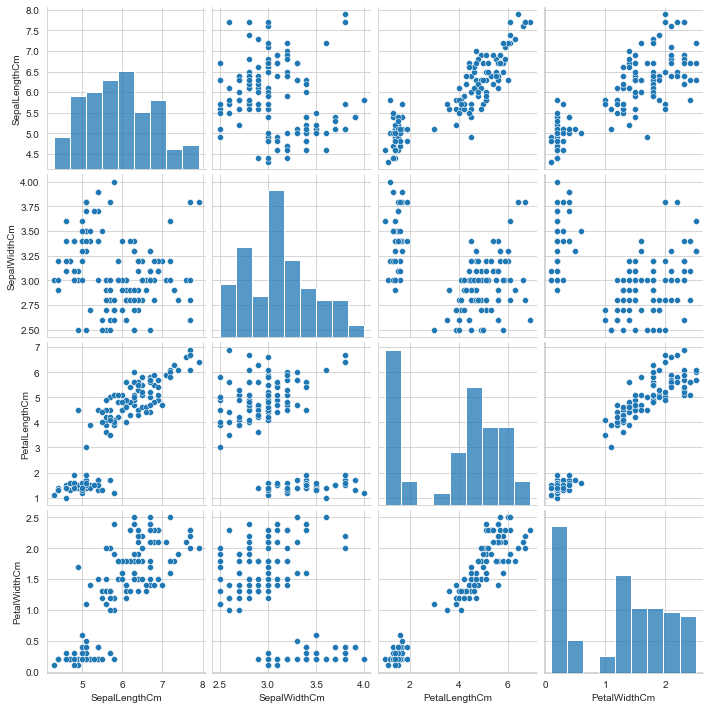

In [18]:
sns.pairplot(data=dataset.drop(columns=['Species']))

In [19]:
dataset.Species.value_counts()

Iris-virginica     48
Iris-setosa        44
Iris-versicolor    41
Name: Species, dtype: int64

#### Analyse Correlations 

In [20]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.195419,0.883433,0.824607
SepalWidthCm,-0.195419,1.000000,-0.473176,-0.411314
PetalLengthCm,0.883433,-0.473176,1.000000,0.961656
PetalWidthCm,0.824607,-0.411314,0.961656,1.000000


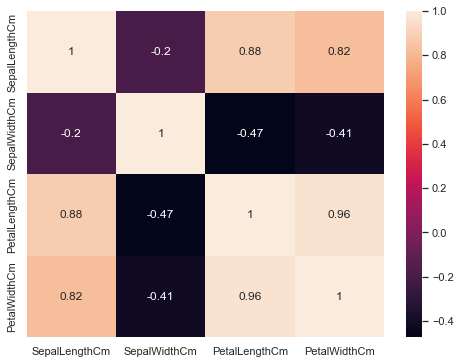

In [21]:
sns.set()
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

### K-means Clustering 

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Species']= label_encoder.fit_transform(dataset['Species']) 
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

pd.DataFrame(scaled_data).describe()

,0,1,2,3,4
count,1.330000e+02,1.330000e+02,1.330000e+02,133.000000,1.330000e+02
mean,-3.205456e-16,-3.472577e-16,-5.342427e-17,0.000000,-1.068485e-16
std,1.003781e+00,1.003781e+00,1.003781e+00,1.003781,1.003781e+00
min,-1.891622e+00,-1.681552e+00,-1.585763e+00,-1.474537,-1.239324e+00
25%,-9.431366e-01,-8.322616e-01,-1.250547e+00,-1.215983,-1.239324e+00
50%,-1.132120e-01,-2.660683e-01,3.696612e-01,0.206066,-3.618465e-02
75%,7.167125e-01,5.832217e-01,7.607460e-01,0.723174,1.166955e+00
max,2.376562e+00,2.564898e+00,1.710523e+00,1.628115,1.166955e+00


In [25]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

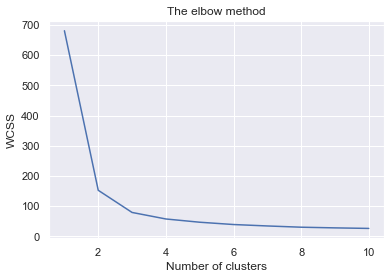

In [26]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)